In [1]:
#%load_ext lab_black

In [20]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from random import normalvariate

import gc
import timeit
import sys
import os

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

## Read intial condition data from top_hits files

In [21]:
# Revoking top hits frames
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Averoy_seen_deer_stoch_par.pkl"
)
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer_stoch_par.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer_stoch_par.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Sunndal_seen_deer_stoch_par.pkl"
)
top_hits_Vestnes_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Vestnes_seen_deer_stoch_par.pkl"
)
top_hits_Laerdal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Laerdal_seen_deer_stoch_par.pkl"
)

In [28]:
# Reading the given number of top_hits
number_of_top_hits = 20
number_of_years = 17

top_hits_Averoy_seen_deer = top_hits_Averoy_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Tingvoll_seen_deer = top_hits_Tingvoll_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Surnadal_seen_deer = top_hits_Surnadal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Sunndal_seen_deer = top_hits_Sunndal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Vestnes_seen_deer = top_hits_Vestnes_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Laerdal_seen_deer = top_hits_Laerdal_seen_deer[
    0 : number_of_top_hits * number_of_years
]

## Find grand mean of the sh_threshold value for number_of_top_hits

In [45]:
top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]

median_sh = np.zeros(len(top_hits_seen_deer))
for q in range(len(top_hits_seen_deer)):
    median_sh[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "sh_threshold"
        ].values
    )
    print(municipalities[q], ":", median_sh[q])
    print(
        municipalities[q],
        ":",
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "sh_threshold"
        ].values,
    )
    print()
grand_mean_sh_threshold = np.mean(median_sh)
print("Grand mean sh_threshold:", grand_mean_sh_threshold)
print()
sh_threshold = median_sh
print("sh_threshold array used below:", sh_threshold)

Averoy : 0.65
Averoy : [0.55 0.65 0.65 0.75 0.55 0.7  0.7  0.65 0.5  0.7  0.65 0.55 0.7  0.7
 0.65 0.6  0.5  0.55 0.7  0.6 ]

Tingvoll : 0.55
Tingvoll : [0.8  0.5  0.6  0.5  0.55 0.7  0.55 0.55 0.5  0.65 0.5  0.5  0.7  0.55
 0.65 0.55 0.5  0.55 0.5  0.55]

Surnadal : 0.55
Surnadal : [0.55 0.55 0.6  0.65 0.65 0.5  0.55 0.5  0.5  0.55 0.75 0.5  0.5  0.5
 0.   0.7  0.55 0.65 0.6  0.5 ]

Sunndal : 0.55
Sunndal : [0.55 0.65 0.7  0.65 0.7  0.55 0.5  0.5  0.75 0.5  0.55 0.5  0.65 0.5
 0.65 0.7  0.5  0.5  0.5  0.5 ]

Vestnes : 0.625
Vestnes : [0.65 0.65 0.6  0.7  0.65 0.8  0.55 0.7  0.6  0.6  0.55 0.75 0.5  0.65
 0.75 0.55 0.65 0.5  0.6  0.55]

Laerdal : 0.55
Laerdal : [0.5  0.6  0.55 0.65 0.6  0.5  0.5  0.5  0.55 0.55 0.55 0.6  0.55 0.65
 0.75 0.55 0.55 0.5  0.6  0.5 ]

Grand mean sh_threshold: 0.5791666666666667

sh_threshold array used below: [0.65  0.55  0.55  0.55  0.625 0.55 ]


## Read out initial condition data from the top_hits frames

In [31]:
init_pop_Q1 = np.zeros(6)
init_pop_Q2 = np.zeros(6)
init_pop_Q3 = np.zeros(6)
i_fcalves = np.zeros(6)
i_yhinds = np.zeros(6)
i_ahinds = np.zeros(6)
i_mcalves = np.zeros(6)
i_ystags = np.zeros(6)
i_astags = np.zeros(6)

for q in range(len(municipalities)):
    init_pop_Q1[q] = np.quantile(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "init_pop"
        ].values,
        0.25,
    )
    init_pop_Q2[q] = np.quantile(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "init_pop"
        ].values,
        0.50,
    )
    init_pop_Q3[q] = np.quantile(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "init_pop"
        ].values,
        0.75,
    )

    # Median population fraction value
    i_fcalves[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "i_fcalves"
        ].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )
    i_yhinds[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["i_yhinds"].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )
    i_ahinds[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["i_ahinds"].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )
    i_mcalves[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years][
            "i_mcalves"
        ].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )
    i_ystags[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["i_ystags"].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )
    i_astags[q] = np.median(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["i_astags"].values
    ) / np.mean(
        top_hits_seen_deer[q][number_of_years - 1 :: number_of_years]["init_pop"].values
    )

    # Test that the sums of median fractions are about 1.0
    print(
        municipalities[q],
        ":",
        i_fcalves[q]
        + i_yhinds[q]
        + i_ahinds[q]
        + i_mcalves[q]
        + i_ystags[q]
        + i_astags[q],
    )

print()
print("init_pop_Q1:", init_pop_Q1)
print("init_pop_Q2:", init_pop_Q2)
print("init_pop_Q3:", init_pop_Q3)
print("i_fcalves:", i_fcalves)
print("i_yhinds:", i_yhinds)
print("i_ahinds:", i_ahinds)
print("i_mcalves:", i_mcalves)
print("i_ystags:", i_ystags)
print("i_astags:", i_astags)

Averoy : 0.9853658536585367
Tingvoll : 0.9783783783783784
Surnadal : 0.9776851397743991
Sunndal : 1.0094715852442673
Vestnes : 0.9773371104815864
Laerdal : 0.980568445475638

init_pop_Q1: [1377.5 2582.5 1890.  1897.5 2210.  1627.5]
init_pop_Q2: [1430. 2665. 2040. 2005. 2325. 1775.]
init_pop_Q3: [1482.5 2757.5 2127.5 2122.5 2372.5 1805. ]
i_fcalves: [0.14111498 0.14669152 0.1625797  0.14930209 0.1422968  0.11919954]
i_yhinds: [0.07770035 0.08033551 0.05100539 0.06904287 0.06886032 0.07424594]
i_ahinds: [0.3358885  0.34986021 0.33619421 0.35767697 0.34386577 0.38167053]
i_mcalves: [0.14111498 0.14669152 0.1625797  0.14930209 0.1422968  0.11919954]
i_ystags: [0.10522648 0.08369059 0.09857773 0.09695912 0.09370233 0.08468677]
i_astags: [0.18432056 0.17110904 0.16674841 0.18718843 0.1863151  0.20156613]


### Calculate winter survival and fertility figures

In [32]:
def winter_mortality_all_categories(
    female_calves, young_hinds, adult_hinds, male_calves, young_stags, adult_stags
):
    # Assumed winter survival parameters for all six population categories
    w_survival = [
        normalvariate(0.8, 0),
        normalvariate(0.92, 0),
        normalvariate(0.93, 0),
        normalvariate(0.8, 0),
        normalvariate(0.87, 0),
        normalvariate(0.93, 0),
    ]

    fraction_female_calves_surviving_winter = w_survival[0]
    fraction_young_hinds_surviving_winter = w_survival[1]
    fraction_adult_hinds_surviving_winter = w_survival[2]
    fraction_male_calves_surviving_winter = w_survival[3]
    fraction_young_stags_surviving_winter = w_survival[4]
    fraction_adult_stags_surviving_winter = w_survival[5]

    female_calves_survivors = female_calves * fraction_female_calves_surviving_winter
    young_hinds_survivors = young_hinds * fraction_young_hinds_surviving_winter
    adult_hinds_survivors = adult_hinds * fraction_adult_hinds_surviving_winter

    male_calves_survivors = male_calves * fraction_male_calves_surviving_winter
    young_stags_survivors = young_stags * fraction_young_stags_surviving_winter
    adult_stags_survivors = adult_stags * fraction_adult_stags_surviving_winter

    return (
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
        fraction_female_calves_surviving_winter,
        fraction_young_hinds_surviving_winter,
        fraction_adult_hinds_surviving_winter,
        fraction_male_calves_surviving_winter,
        fraction_young_stags_surviving_winter,
        fraction_adult_stags_surviving_winter,
    )

### Spring update of population categories 

In [33]:
def spring_update_of_categories(
    female_calves_survivors,
    young_hinds_survivors,
    adult_hinds_survivors,
    male_calves_survivors,
    young_stags_survivors,
    adult_stags_survivors,
):
    # Surviving female calves become one year old young hinds
    young_hinds = female_calves_survivors

    # Surviving young hinds born almost two years ago become adult hinds
    adult_hinds = young_hinds_survivors + adult_hinds_survivors

    # Surviving male calves become one year old young stags
    young_stags = male_calves_survivors

    # Surviving young stags born almost two years ago become adult stags
    adult_stags = young_stags_survivors + adult_stags_survivors
    return young_hinds, adult_hinds, young_stags, adult_stags

### Calculate number of female and male calves born in early summer

In [34]:
def early_summer_breeding(young_hinds_survivors, adult_hinds_survivors):

    # Assumed fertility parameters for young and adult hinds
    # calves_per_young_hind = normalvariate(0.4, 0.05)
    calves_per_young_hind = normalvariate(0.4, 0)

    # calves_per_adult_hind = normalvariate(0.975, 0.008)
    calves_per_adult_hind = normalvariate(0.975, 0)
    if calves_per_adult_hind >= 1.0:
        calves_per_adult_hind = 1.0

    female_calves_born = (
        young_hinds_survivors * calves_per_young_hind / 2
        + adult_hinds_survivors * calves_per_adult_hind / 2
    )
    male_calves_born = female_calves_born
    return (
        female_calves_born,
        male_calves_born,
        calves_per_young_hind,
        calves_per_adult_hind,
    )

### Calculate putative emigration of stags

In [35]:
def emigration_of_stags(stags_per_hind_threshold, adult_stags, adult_hinds):
    """
    Does not account for the hypothesis that migration is primarily sported by
    the two years old stags. The way we deal with the emigration issue is highly
    idealized as we say that when the number of adult stags per adult hind is
    larger than a certain number, then stags will emigrate until the ratio falls
    below this number. The underlying hypothesis is that the stags are
    capable of making an assessment of their potential breeding success based on
    perceptual data during the winter and the spring and act on this information
    by use of a built in algorithm.
    """

    if stags_per_hind_threshold == 0 or adult_hinds < 1:
        number_of_migrants = 0
    else:
        number_of_migrants = adult_stags - stags_per_hind_threshold * adult_hinds
        if number_of_migrants <= 0:
            number_of_migrants = 0

    if number_of_migrants > 0:
        migration_percentage = 100 * number_of_migrants / adult_stags
    else:
        migration_percentage = 0

    adult_stags = adult_stags - number_of_migrants

    return adult_stags, number_of_migrants, migration_percentage

### Calculate number of individuals in each category surviving the hunting season

In [36]:
def transform_harvested_percentages_to_numbers(
    total_harvest,
    fraction_female_calves_harvested,
    fraction_male_calves_harvested,
    fraction_young_hinds_harvested,
    fraction_adult_hinds_harvested,
    fraction_young_stags_harvested,
    fraction_adult_stags_harvested,
):
    number_harvested_female_calves = np.round(
        np.multiply(np.array(fraction_female_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_hinds = np.round(
        np.multiply(np.array(fraction_young_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_hinds = np.round(
        np.multiply(np.array(fraction_adult_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_male_calves = np.round(
        np.multiply(np.array(fraction_male_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_stags = np.round(
        np.multiply(np.array(fraction_young_stags_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_stags = np.round(
        np.multiply(np.array(fraction_adult_stags_harvested), np.array(total_harvest))
        / 100
    )
    return (
        number_harvested_female_calves,
        number_harvested_young_hinds,
        number_harvested_adult_hinds,
        number_harvested_male_calves,
        number_harvested_young_stags,
        number_harvested_adult_stags,
    )

In [37]:
def survivors_after_hunting(
    number_harvested_female_calves,
    number_harvested_young_hinds,
    number_harvested_adult_hinds,
    number_harvested_male_calves,
    number_harvested_young_stags,
    number_harvested_adult_stags,
    female_calves_born,
    male_calves_born,
    young_hinds,
    adult_hinds,
    young_stags,
    adult_stags,
):
    female_calves_survivors = female_calves_born - number_harvested_female_calves
    young_hinds_survivors = young_hinds - number_harvested_young_hinds
    adult_hinds_survivors = adult_hinds - number_harvested_adult_hinds

    male_calves_survivors = male_calves_born - number_harvested_male_calves
    young_stags_survivors = young_stags - number_harvested_young_stags
    adult_stags_survivors = adult_stags - number_harvested_adult_stags

    if female_calves_survivors < 0:
        female_calves_survivors = 0
    if young_hinds_survivors < 0:
        young_hinds_survivors = 0
    if adult_hinds_survivors < 0:
        adult_hinds_survivors = 0

    if male_calves_survivors < 0:
        male_calves_survivors = 0
    if young_stags_survivors < 0:
        young_stags_survivors = 0
    if adult_stags_survivors < 0:
        adult_stags_survivors = 0
    return (
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
    )

### Project population development from one year to the next

In [38]:
def project_population_development(
    number_harvested_female_calves,
    number_harvested_young_hinds,
    number_harvested_adult_hinds,
    number_harvested_male_calves,
    number_harvested_young_stags,
    number_harvested_adult_stags,
    female_calves_survivors,
    young_hinds_survivors,
    adult_hinds_survivors,
    male_calves_survivors,
    young_stags_survivors,
    adult_stags_survivors,
    stags_per_hind_threshold,
    year,
):

    # Let Mother winter take her toll
    (
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
        fraction_female_calves_surviving_winter,
        fraction_young_hinds_surviving_winter,
        fraction_adult_hinds_surviving_winter,
        fraction_male_calves_surviving_winter,
        fraction_young_stags_surviving_winter,
        fraction_adult_stags_surviving_winter,
    ) = winter_mortality_all_categories(
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
    )

    # Let calves become young ones and young ones become adults
    young_hinds, adult_hinds, young_stags, adult_stags = spring_update_of_categories(
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
    )
    # Total population in the spring
    total_population_in_spring = young_hinds + adult_hinds + young_stags + adult_stags

    # Time for giving birth
    (
        female_calves_born,
        male_calves_born,
        calves_per_young_hind,
        calves_per_adult_hind,
    ) = early_summer_breeding(young_hinds_survivors, adult_hinds_survivors)

    # A tough decision made by stags
    adult_stags, number_of_migrants, migration_percentage = emigration_of_stags(
        stags_per_hind_threshold, adult_stags, adult_hinds
    )

    # Calculate ratio hinds per stag just before hunting season
    if (young_stags + adult_stags) > 1.0:
        hinds_per_stag_before_hunting = (young_hinds + adult_hinds) / (
            young_stags + adult_stags
        )
    else:
        hinds_per_stag_before_hunting = "NaN"

    # Total population just before hunting season starts
    total_population_before_hunting = (
        female_calves_born
        + young_hinds
        + adult_hinds
        + male_calves_born
        + young_stags
        + adult_stags
    )

    # Oh Deer, life is becoming dangerous
    (
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
    ) = survivors_after_hunting(
        number_harvested_female_calves,
        number_harvested_young_hinds,
        number_harvested_adult_hinds,
        number_harvested_male_calves,
        number_harvested_young_stags,
        number_harvested_adult_stags,
        female_calves_born,
        male_calves_born,
        young_hinds,
        adult_hinds,
        young_stags,
        adult_stags,
    )

    # Total population in December after end of hunting season
    total_population_after_hunting = (
        female_calves_survivors
        + young_hinds_survivors
        + adult_hinds_survivors
        + male_calves_survivors
        + young_stags_survivors
        + adult_stags_survivors
    )

    # Calculate ratio hinds per stag in December after end of hunting season
    if (young_stags_survivors + adult_stags_survivors) > 1:
        hinds_per_stag_after_hunting = (
            young_hinds_survivors + adult_hinds_survivors
        ) / (young_stags_survivors + adult_stags_survivors)
    else:
        hinds_per_stag_after_hunting = "NaN"

    return (
        total_population_in_spring,
        number_of_migrants,
        migration_percentage,
        hinds_per_stag_before_hunting,
        total_population_before_hunting,
        female_calves_survivors,
        young_hinds_survivors,
        adult_hinds_survivors,
        male_calves_survivors,
        young_stags_survivors,
        adult_stags_survivors,
        total_population_after_hunting,
        hinds_per_stag_after_hunting,
        fraction_female_calves_surviving_winter,
        fraction_young_hinds_surviving_winter,
        fraction_adult_hinds_surviving_winter,
        fraction_male_calves_surviving_winter,
        fraction_young_stags_surviving_winter,
        fraction_adult_stags_surviving_winter,
        calves_per_young_hind,
        calves_per_adult_hind,
    )

### Main scripts for low, median and high initial population

In [39]:
def main_script(
    fraction,
    init_pop_size,
    i_fcalves,
    i_yhinds,
    i_ahinds,
    i_mcalves,
    i_ystags,
    i_astags,
    sh_threshold,
):
    tot_pop_prehunt = np.zeros((6, 17))
    tot_pop_posthunt = np.zeros((6, 17))
    # Make one initial states array for each municipality
    initial_state = np.zeros((6, 8))
    initial_state[0, :] = [
        init_pop_size[0] * fraction,
        i_fcalves[0],
        i_yhinds[0],
        i_ahinds[0],
        i_mcalves[0],
        i_ystags[0],
        i_astags[0],
        sh_threshold[0],
    ]
    initial_state[1, :] = [
        init_pop_size[1] * fraction,
        i_fcalves[1],
        i_yhinds[1],
        i_ahinds[1],
        i_mcalves[1],
        i_ystags[1],
        i_astags[1],
        sh_threshold[1],
    ]
    initial_state[2, :] = [
        init_pop_size[2] * fraction,
        i_fcalves[2],
        i_yhinds[2],
        i_ahinds[2],
        i_mcalves[2],
        i_ystags[2],
        i_astags[2],
        sh_threshold[2],
    ]
    initial_state[3, :] = [
        init_pop_size[3] * fraction,
        i_fcalves[3],
        i_yhinds[3],
        i_ahinds[3],
        i_mcalves[3],
        i_ystags[3],
        i_astags[3],
        sh_threshold[3],
    ]
    initial_state[4, :] = [
        init_pop_size[4] * fraction,
        i_fcalves[4],
        i_yhinds[4],
        i_ahinds[4],
        i_mcalves[4],
        i_ystags[4],
        i_astags[4],
        sh_threshold[4],
    ]
    initial_state[5, :] = [
        init_pop_size[5] * fraction,
        i_fcalves[5],
        i_yhinds[5],
        i_ahinds[5],
        i_mcalves[5],
        i_ystags[5],
        i_astags[5],
        sh_threshold[5],
    ]

    # Using all six municipalties
    municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
    data_municipality = [
        data_Averoy,
        data_Tingvoll,
        data_Surnadal,
        data_Sunndal,
        data_Vestnes,
        data_Laerdal,
    ]

    for q in range(len(municipalities)):
        [
            municipality,
            first_year,
            last_year,
            number_of_years,
            years,
            seen_deer_obs,
            seen_deer_obs_forest,
            seen_deer_obs_farmland,
            hinds_per_stag_obs,
            total_harvest,
            total_quota,
            fraction_female_calves_harvested,
            fraction_young_hinds_harvested,
            fraction_adult_hinds_harvested,
            fraction_male_calves_harvested,
            fraction_young_stags_harvested,
            fraction_adult_stags_harvested,
            spring_counts,
        ] = data_municipality[q]

        # Transform reported hunting percentages for all years to numbers
        (
            number_harvested_female_calves,
            number_harvested_young_hinds,
            number_harvested_adult_hinds,
            number_harvested_male_calves,
            number_harvested_young_stags,
            number_harvested_adult_stags,
        ) = transform_harvested_percentages_to_numbers(
            total_harvest,
            fraction_female_calves_harvested,
            fraction_male_calves_harvested,
            fraction_young_hinds_harvested,
            fraction_adult_hinds_harvested,
            fraction_young_stags_harvested,
            fraction_adult_stags_harvested,
        )

        # Initiating the total log array for a given population
        population_log = np.zeros((number_of_years, 30))

        # Initial population structure
        female_calves_survivors = initial_state[q, 1] * initial_state[q, 0]
        young_hinds_survivors = initial_state[q, 2] * initial_state[q, 0]
        adult_hinds_survivors = initial_state[q, 3] * initial_state[q, 0]
        male_calves_survivors = initial_state[q, 4] * initial_state[q, 0]
        young_stags_survivors = initial_state[q, 5] * initial_state[q, 0]
        adult_stags_survivors = initial_state[q, 6] * initial_state[q, 0]

        # Record initial sizes of the six categories
        female_calves_initially = female_calves_survivors
        young_hinds_initially = young_hinds_survivors
        adult_hinds_initially = adult_hinds_survivors
        male_calves_initially = male_calves_survivors
        young_stags_initially = young_stags_survivors
        adult_stags_initially = adult_stags_survivors

        # Run through all years in the time series for each initial state
        counter = 0
        for j in range(number_of_years):
            (
                total_population_in_spring,
                number_of_migrants,
                migration_percentage,
                hinds_per_stag_before_hunting,
                total_population_before_hunting,
                female_calves_survivors,
                young_hinds_survivors,
                adult_hinds_survivors,
                male_calves_survivors,
                young_stags_survivors,
                adult_stags_survivors,
                total_population_after_hunting,
                hinds_per_stag_after_hunting,
                fraction_female_calves_surviving_winter,
                fraction_young_hinds_surviving_winter,
                fraction_adult_hinds_surviving_winter,
                fraction_male_calves_surviving_winter,
                fraction_young_stags_surviving_winter,
                fraction_adult_stags_surviving_winter,
                calves_per_young_hind,
                calves_per_adult_hind,
            ) = project_population_development(
                number_harvested_female_calves[j],
                number_harvested_young_hinds[j],
                number_harvested_adult_hinds[j],
                number_harvested_male_calves[j],
                number_harvested_young_stags[j],
                number_harvested_adult_stags[j],
                female_calves_survivors,
                young_hinds_survivors,
                adult_hinds_survivors,
                male_calves_survivors,
                young_stags_survivors,
                adult_stags_survivors,
                initial_state[q, 7],
                j,
            )

            population_log[counter, :] = [
                initial_state[q, 0],
                initial_state[q, 7],
                female_calves_initially,
                young_hinds_initially,
                adult_hinds_initially,
                male_calves_initially,
                young_stags_initially,
                adult_stags_initially,
                first_year + j,
                female_calves_survivors,
                young_hinds_survivors,
                adult_hinds_survivors,
                male_calves_survivors,
                young_stags_survivors,
                adult_stags_survivors,
                total_population_in_spring,
                total_population_before_hunting,
                total_population_after_hunting,
                hinds_per_stag_before_hunting,
                hinds_per_stag_after_hunting,
                migration_percentage,
                number_of_migrants,
                fraction_female_calves_surviving_winter,
                fraction_young_hinds_surviving_winter,
                fraction_adult_hinds_surviving_winter,
                fraction_male_calves_surviving_winter,
                fraction_young_stags_surviving_winter,
                fraction_adult_stags_surviving_winter,
                calves_per_young_hind,
                calves_per_adult_hind,
            ]

            counter = counter + 1

        # Make pandas dataframe for given municipality
        column_values = [
            "init_pop",
            "sh_threshold",
            "i_fcalves",
            "i_yhinds",
            "i_ahinds",
            "i_mcalves",
            "i_ystags",
            "i_astags",
            "obs_year",
            "f_calves",
            "y_hinds",
            "a_hinds",
            "m_calves",
            "y_stags",
            "a_stags",
            "spring_pop",
            "tot_pop_bh",
            "tot_pop_ah",
            "hps_bh",
            "hps_ah",
            "mig%",
            "num_migs",
            "ws_fc",
            "ws_yh",
            "ws_ah",
            "ws_mc",
            "ws_ys",
            "ws_as",
            "c_yh",
            "c_ah",
        ]
        pop_data = pd.DataFrame(data=population_log, columns=column_values)
        pop_data = pop_data.astype(
            {
                "init_pop": "int",
                "obs_year": "int",
                "i_fcalves": "int",
                "i_yhinds": "int",
                "i_ahinds": "int",
                "i_mcalves": "int",
                "i_ystags": "int",
                "i_astags": "int",
                "f_calves": "int",
                "y_hinds": "int",
                "a_hinds": "int",
                "m_calves": "int",
                "y_stags": "int",
                "a_stags": "int",
                "spring_pop": "int",
                "tot_pop_bh": "int",
                "tot_pop_ah": "int",
                "num_migs": "int",
            }
        ).round(4)

        tot_pop_prehunt[q, :] = pop_data["tot_pop_bh"].values
        tot_pop_posthunt[q, :] = pop_data["tot_pop_ah"].values

    return tot_pop_prehunt, tot_pop_posthunt

In [40]:
# run the show

for i in range(3):
    if i == 0:
        fraction = 0.9
        tot_pop_prehunt_low, tot_pop_posthunt_low = main_script(
            fraction,
            init_pop_Q1,
            i_fcalves,
            i_yhinds,
            i_ahinds,
            i_mcalves,
            i_ystags,
            i_astags,
            sh_threshold,
        )
        print("tot_pop_prehunt_low:", tot_pop_prehunt_low)
        print()
    if i == 1:
        fraction = 1.0
        tot_pop_prehunt_median, tot_pop_posthunt_median = main_script(
            fraction,
            init_pop_Q2,
            i_fcalves,
            i_yhinds,
            i_ahinds,
            i_mcalves,
            i_ystags,
            i_astags,
            sh_threshold,
        )
        print("tot_pop_prehunt_median:", tot_pop_prehunt_median)
        print()
    if i == 2:
        fraction = 1.0  # 1.1
        tot_pop_prehunt_high, tot_pop_posthunt_high = main_script(
            fraction,
            init_pop_Q3,
            i_fcalves,
            i_yhinds,
            i_ahinds,
            i_mcalves,
            i_ystags,
            i_astags,
            sh_threshold,
        )
        print("tot_pop_prehunt_high:", tot_pop_prehunt_high)

tot_pop_prehunt_low: [[1.478e+03 1.535e+03 1.590e+03 1.490e+03 1.406e+03 1.334e+03 1.333e+03
  1.287e+03 1.262e+03 1.251e+03 1.237e+03 1.254e+03 1.169e+03 9.650e+02
  6.050e+02 1.700e+02 1.000e+00]
 [2.790e+03 2.824e+03 2.770e+03 2.658e+03 2.513e+03 2.401e+03 2.397e+03
  2.373e+03 2.247e+03 2.087e+03 1.825e+03 1.546e+03 1.061e+03 5.730e+02
  5.500e+01 0.000e+00 0.000e+00]
 [1.941e+03 1.922e+03 1.897e+03 1.823e+03 1.678e+03 1.563e+03 1.476e+03
  1.368e+03 1.261e+03 1.111e+03 9.060e+02 6.370e+02 3.150e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.053e+03 2.005e+03 1.963e+03 1.916e+03 1.769e+03 1.651e+03 1.539e+03
  1.376e+03 1.286e+03 1.148e+03 9.120e+02 5.860e+02 3.350e+02 9.000e+01
  0.000e+00 0.000e+00 0.000e+00]
 [2.361e+03 2.424e+03 2.408e+03 2.276e+03 2.083e+03 2.083e+03 2.078e+03
  2.006e+03 1.966e+03 1.938e+03 1.850e+03 1.677e+03 1.434e+03 1.047e+03
  6.300e+02 1.500e+02 0.000e+00]
 [1.787e+03 1.793e+03 1.803e+03 1.768e+03 1.688e+03 1.652e+03 1.659e+03
  1.623e+03 1.515e+03 

## Plot results

In [41]:
def find_min_scaling(seen_deer_e, seen_deer_p):
    # Find the scaling factor that minimises the L2_norm
    scaling_factor = np.sum(np.multiply(seen_deer_p, seen_deer_e)) / np.sum(
        np.multiply(seen_deer_p, seen_deer_p)
    )

    scaled_p_vector = scaling_factor * seen_deer_p

    return scaled_p_vector

In [42]:
def plot_comp_seen_deer(municipalities, data_municipality, ax, scaling_type):
    afont = {"fontname": "Arial"}
    for location in municipalities:
        if location == "Averoy":
            q = 0
        if location == "Tingvoll":
            q = 1
        if location == "Surnadal":
            q = 2
        if location == "Sunndal":
            q = 3
        if location == "Vestnes":
            q = 4
        if location == "Laerdal":
            q = 5

        [
            municipality,
            first_year,
            last_year,
            number_of_years,
            years,
            seen_deer_obs,
            seen_deer_obs_forest,
            seen_deer_obs_farmland,
            hinds_per_stag_obs,
            total_harvest,
            total_quota,
            fraction_female_calves_harvested,
            fraction_young_hinds_harvested,
            fraction_adult_hinds_harvested,
            fraction_male_calves_harvested,
            fraction_young_stags_harvested,
            fraction_adult_stags_harvested,
            spring_counts,
        ] = data_municipality[q]

        if location == "Surnadal":
            seen_deer_e = np.array(seen_deer_obs_farmland)
        else:
            seen_deer_e = np.array(seen_deer_obs)

        if scaling_type == "mean":
            # Scale the prediction array
            scaling_factor_low = np.mean(seen_deer_e) / tot_pop_prehunt_low[q, 0]
            scaling_factor_median = np.mean(seen_deer_e) / tot_pop_prehunt_median[q, 0]
            scaling_factor_high = np.mean(seen_deer_e) / tot_pop_prehunt_high[q, 0]

            seen_deer_p_scaled_low = scaling_factor_low * tot_pop_prehunt_low[q, :]
            seen_deer_p_scaled_median = (
                scaling_factor_median * tot_pop_prehunt_median[q, :]
            )
            seen_deer_p_scaled_high = scaling_factor_high * tot_pop_prehunt_high[q, :]

        if scaling_type == "L2_distance":
            # Scales the projection figure by using the L2 distance minimization procedure
            seen_deer_p_scaled_low = find_min_scaling(
                seen_deer_e, tot_pop_prehunt_low[q, :]
            )
            seen_deer_p_scaled_median = find_min_scaling(
                seen_deer_e, tot_pop_prehunt_median[q, :]
            )
            seen_deer_p_scaled_high = find_min_scaling(
                seen_deer_e, tot_pop_prehunt_high[q, :]
            )

        # Make dotplot
        year_list = np.arange(number_of_years)
        ax[q].plot(year_list, seen_deer_p_scaled_low, "bo-", markersize=6)
        # ax[q].plot(year_list, seen_deer_p_scaled_median, "mo-", markersize=6)
        ax[q].plot(year_list, seen_deer_p_scaled_high, "co-", markersize=6)

        formatter = ticker.FormatStrFormatter("%.2f")
        ax[q].yaxis.set_major_formatter(formatter)
        no_text = [""] * number_of_years
        if q < 4:
            ax[q].set_xticks(year_list)
            ax[q].set_xticklabels(no_text)
        else:
            ax[q].set_xticks(year_list)
            ax[q].set_xticklabels(years, rotation="vertical")

        ax[q].set_ylabel(municipality + " (seen_deer h$^{-1}$)", fontsize=12, **afont)
        ax[q].plot(year_list, seen_deer_e, "ro", markersize=6)

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.tight_layout()
    save_dir = "figures/"
    if scaling_type == "mean":
        plt.savefig(save_dir + "Figure_5.pdf", dpi=600, bbox_inches="tight")
    if scaling_type == "L2_distance":
        plt.savefig(save_dir + "Figure_5.pdf", dpi=600, bbox_inches="tight")

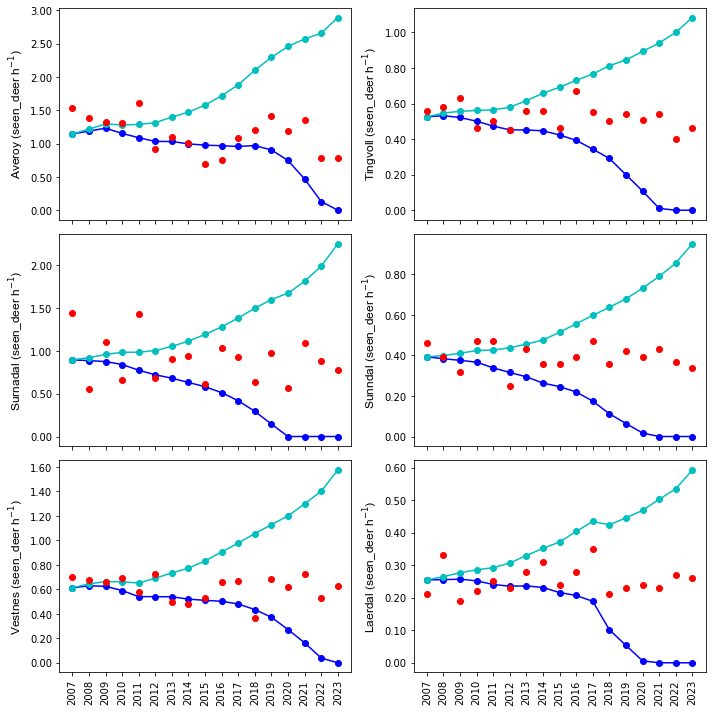

In [43]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
# ax1 = [axs[0], axs[1], axs[2], axs[3], axs[4], axs[5]]
ax1 = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1], axs[2, 0], axs[2, 1]]
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
scaling_type = "mean"  # "L2_distance"
plot_comp_seen_deer(municipalities, data_municipality, ax1, scaling_type)